In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import glob
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
import sys ; sys.path.append("../")
from utils.pyfunctions import *

In [3]:
# Setup your PBSCluster
import dask
from dask_jobqueue import PBSCluster
from dask.distributed import Client
ncores=1
nmem='10GB'
cluster = PBSCluster(
    cores=ncores, # The number of cores you want
    memory=nmem, # Amount of memory
    processes=1, # How many processes
    queue='casper', # The type of queue to utilize (/glade/u/apps/dav/opt/usr/bin/execcasper)
    local_directory='$TMPDIR', # Use your local directory
    resource_spec='select=1:ncpus='+str(ncores)+':mem='+nmem, # Specify resources
    project='P93300641', # Input your project ID here
    walltime='01:00:00', # Amount of wall time
    #interface='ib0', # Interface to use
)

# Scale up
cluster.scale(10)

# Setup your client
client = Client(cluster)

/glade/u/home/linnia/miniconda3/envs/ppe-py/lib/python3.7/site-packages/dask_jobqueue/core.py:20: FutureWarning: tmpfile is deprecated and will be removed in a future release. Please use dask.utils.tmpfile instead.
  from distributed.utils import tmpfile
/glade/u/home/linnia/miniconda3/envs/ppe-py/lib/python3.7/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 42291 instead
  f"Port {expected} is already in use.\n"


In [4]:
la=xr.open_dataset('../utils/sparsegrid_landarea.nc').landarea

In [5]:
def preprocess(ds):
    dvs=['TLAI','TWS','GPP','NPP','TOTVEGC','TOTSOMC','TOTECOSYSC']
    return ds[dvs]

In [6]:
def readin_hist(path,preprocess,startyear):
    files =glob.glob(path+'*.h0.*')
    f=sorted(files)

    ds=xr.open_mfdataset(f,combine='nested',concat_dim=['time'],
                     preprocess=preprocess,decode_times=False,parallel=True)
    ds['time']=xr.cftime_range(str(startyear),periods=len(ds.time),freq='MS',calendar='noleap')
    return ds

### xl Max

In [23]:
path = '/glade/derecho/scratch/linnia/ctsm5.3.0_transient_test0017/run/'
startyear = '1850'
ds_double_xl = readin_hist(path,preprocess,startyear)

In [29]:
tlai_amean_xl2x = gmean(amean(ds_double_xl.TLAI),la).compute()
tvc_amean_xl2x = gmean(amean(ds_double_xl.TOTVEGC),la).compute()
tecoc_amean_xl2x = gmean(amean(ds_double_xl.TOTECOSYSC),la).compute()

In [27]:
path = '/glade/derecho/scratch/linnia/ctsm5.3.0_transient_test0016/run/'
startyear = '1850'
ds_single_xl = readin_hist(path,preprocess,startyear)

tlai_amean_xl1x = gmean(amean(ds_single_xl.TLAI),la).compute()
tvc_amean_xl1x = gmean(amean(ds_single_xl.TOTVEGC),la).compute()
tecoc_amean_xl1x = gmean(amean(ds_single_xl.TOTECOSYSC),la).compute()

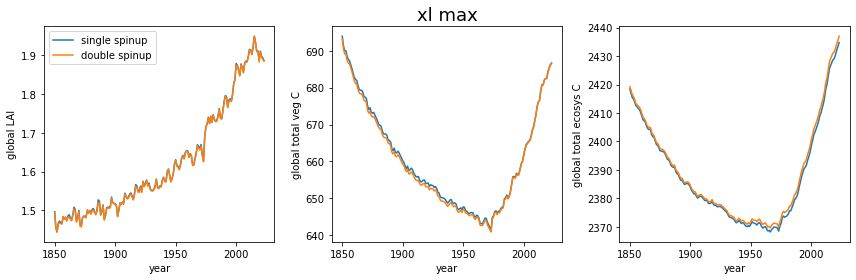

In [40]:
plt.figure(figsize=(12,4))
cf = 1e-9*la.sum()

plt.subplot(1,3,1)
tlai_amean_xl1x.plot(label='single spinup')
tlai_amean_xl2x.plot(label='double spinup')
plt.ylabel('global LAI')
plt.legend()

plt.subplot(1,3,2)
(cf*tvc_amean_xl1x).plot()
(cf*tvc_amean_xl2x).plot()
plt.ylabel('global total veg C')
plt.title('xl max', fontsize=18)

plt.subplot(1,3,3)
(cf*tecoc_amean_xl1x).plot()
(cf*tecoc_amean_xl2x).plot()
plt.ylabel('global total ecosys C')

plt.tight_layout()

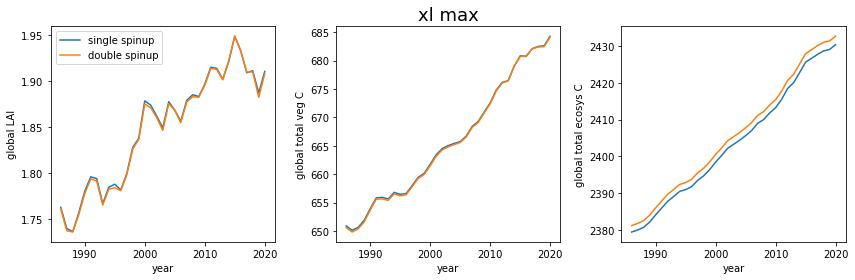

In [38]:
plt.figure(figsize=(12,4))
cf = 1e-9*la.sum()

plt.subplot(1,3,1)
ds.sel(time=slice("1985-01-01", "2020-12-31"))
tlai_amean_xl1x.sel(year=slice("1985-01-01", "2020-12-31")).plot(label='single spinup')
tlai_amean_xl2x.sel(year=slice("1985-01-01", "2020-12-31")).plot(label='double spinup')
plt.ylabel('global LAI')
plt.legend()

plt.subplot(1,3,2)
(cf*tvc_amean_xl1x.sel(year=slice("1985-01-01", "2020-12-31"))).plot()
(cf*tvc_amean_xl2x.sel(year=slice("1985-01-01", "2020-12-31"))).plot()
plt.ylabel('global total veg C')
plt.title('xl max', fontsize=18)

plt.subplot(1,3,3)
(cf*tecoc_amean_xl1x.sel(year=slice("1985-01-01", "2020-12-31"))).plot()
(cf*tecoc_amean_xl2x.sel(year=slice("1985-01-01", "2020-12-31"))).plot()
plt.ylabel('global total ecosys C')

plt.tight_layout()

### LeafCN max

In [30]:
path = '/glade/derecho/scratch/linnia/ctsm5.3.0_transient_test0014/run/'
startyear = '1850'
ds_single_leafcn = readin_hist(path,preprocess,startyear)

tlai_amean_1x = gmean(amean(ds_single_leafcn.TLAI),la).compute()
tvc_amean_1x = gmean(amean(ds_single_leafcn.TOTVEGC),la).compute()
tecoc_amean_1x = gmean(amean(ds_single_leafcn.TOTECOSYSC),la).compute()

In [32]:
path = '/glade/derecho/scratch/linnia/ctsm5.3.0_transient_test0015/run/'
startyear = '1850'
ds_double_leafcn = readin_hist(path,preprocess,startyear)

tlai_amean_2x = gmean(amean(ds_single_leafcn.TLAI),la).compute()
tvc_amean_2x = gmean(amean(ds_single_leafcn.TOTVEGC),la).compute()
tecoc_amean_2x = gmean(amean(ds_single_leafcn.TOTECOSYSC),la).compute()

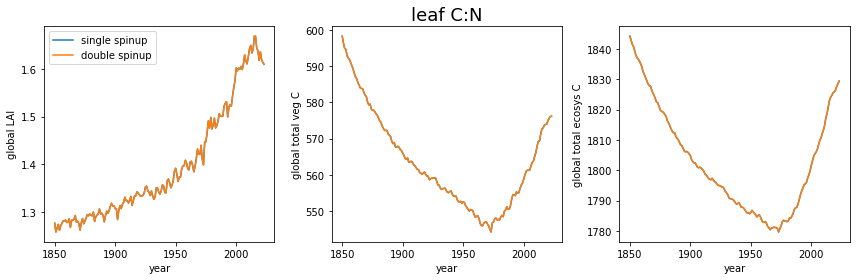

In [41]:
plt.figure(figsize=(12,4))
cf = 1e-9*la.sum()

plt.subplot(1,3,1)
tlai_amean_1x.plot(label='single spinup')
tlai_amean_2x.plot(label='double spinup')
plt.ylabel('global LAI')
plt.legend()

plt.subplot(1,3,2)
(cf*tvc_amean_1x).plot()
(cf*tvc_amean_2x).plot()
plt.ylabel('global total veg C')
plt.title('leaf C:N',fontsize=18)

plt.subplot(1,3,3)
(cf*tecoc_amean_1x).plot()
(cf*tecoc_amean_2x).plot()
plt.ylabel('global total ecosys C')

plt.tight_layout()

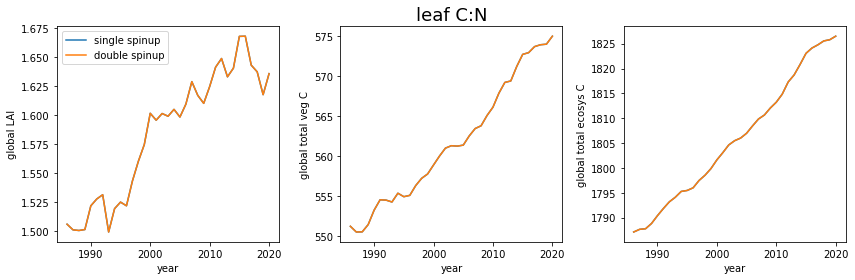

In [39]:
plt.figure(figsize=(12,4))
cf = 1e-9*la.sum()

plt.subplot(1,3,1)
tlai_amean_1x.sel(year=slice("1985-01-01", "2020-12-31")).plot(label='single spinup')
tlai_amean_2x.sel(year=slice("1985-01-01", "2020-12-31")).plot(label='double spinup')
plt.ylabel('global LAI')
plt.legend()

plt.subplot(1,3,2)
(cf*tvc_amean_1x.sel(year=slice("1985-01-01", "2020-12-31"))).plot()
(cf*tvc_amean_2x.sel(year=slice("1985-01-01", "2020-12-31"))).plot()
plt.ylabel('global total veg C')
plt.title('leaf C:N',fontsize=18)

plt.subplot(1,3,3)
(cf*tecoc_amean_1x.sel(year=slice("1985-01-01", "2020-12-31"))).plot()
(cf*tecoc_amean_2x.sel(year=slice("1985-01-01", "2020-12-31"))).plot()
plt.ylabel('global total ecosys C')

plt.tight_layout()